In [4]:
class TModelPoly:
    def __init__(self, x):
        self.S = 0
        self.X = x
        self.C = [0] * len(x)
        self.V = [[1] * len(x)]

    def Next(self):
        #print(self.C)
        r = 1
        for i in range(len(self.C)):
            r = r * self.V[self.C[i]][i]

        if self.C[0] == self.S:
            self.S = self.S + 1
            self.V.append([])
            for i in range(len(self.C)):
                self.C[i] = 0
                self.V[self.S].append(self.V[self.S - 1][i] * float(self.X[i]))
            self.C[-1] = self.S
        else:
            if self.C[-1] > 0:
                self.C[-2] = self.C[-2] + 1
                self.C[-1] = self.C[-1] - 1
            else:
                i = -2
                while self.C[i] == 0:
                    i = i - 1
                self.C[i - 1] = self.C[i - 1] + 1
                self.C[-1] = self.C[i] - 1
                self.C[i] = 0
        return r

class TPolyRegression:
    def __init__(self, s):
        self.S = s
        self.D = None
        
    def GetPolyArray(self, x):
        if self.D == None:
            self.D = len(x)
        else:
            if self.D != len(x):
                raise BaseException("incorrect x vector %s need % elements" % (str(x), self.D))
            
        pm = TModelPoly(x)
        v = []
        while pm.S <= self.S:
            v.append(pm.Next())
        return v
    
    def GenerateMX(self, x):
        from numpy.linalg import inv
        import numpy as np
        T = []
        for cp in x:
            T.append(self.GetPolyArray(cp))
        T = np.array(T)
        (cols, rows) = T.shape
        if rows > cols:
            raise BaseException("Not enough sample, need at least %d, provided %d" % (rows, cols))
        TT = T.transpose()
        return np.dot(inv(np.dot(TT, T)), TT)

    def NewY(self, MX, y):
        import numpy as np
        self.R = np.dot(MX, np.array(y))

    def Learn(self, x, y):
        import numpy as np
        MX = self.GenerateMX(x)
        self.NewY(MX, y)

    def PrepareX(self,x):
        import numpy as np
        return np.array([self.GetPolyArray(x)])

    def Predict(self, px):
        import numpy as np
        return np.dot(px, self.R)[0]

    def GetValue(self, x):
        return self.Predict(self.PrepareX(x))
    
    def DumpR(self):
        pm = TModelPoly([0] * self.D)
        for p in self.R:
            poly = ""
            s = ""
            i = 0
            for v in pm.C:
                if v > 0:
                    poly += s + " x" + str(i)
                    if v > 1:
                        poly += "^" + str(v)
                    s = " *"
                i+=1
            if len(poly) == 0:
                poly = "1"
            print(p, poly)
            pm.Next()



In [123]:
pr = TPolyRegression(3)

x=[]
y=[]
for x0 in range(100):
    for x1 in range(100):
        x.append([x0,x1])
        y.append([4 * x0 * x0 + 12 * x0 * x1 -7 * x1 * x1 + 77 * x0 + 33 * x1 + 999,
                  12 * x0 * x0 * x0 + 5 * x1 * x1 * x1])
pr.Learn(x,y)
pr.DumpR()


[ 9.99000000e+02 -3.99879355e-07] 1
[3.30000000e+01 8.70059012e-08]  x1
[7.70000000e+01 5.60894478e-08]  x0
[-7.00000000e+00 -1.67762693e-09]  x1^2
[ 1.20000000e+01 -9.86595694e-10]  x0 * x1
[ 4.00000000e+00 -9.23797927e-10]  x0^2
[5.64114727e-14 5.00000000e+00]  x1^3
[4.05276940e-14 5.53718182e-12]  x0 * x1^2
[3.45472349e-14 4.99023045e-12]  x0^2 * x1
[2.66958764e-14 1.20000000e+01]  x0^3


In [2]:
m = [(3,0.55),(50,0.501),(100,0.454),(150,0.414),(200,0.382),(250,0.354),(300,0.33),(350,0.308),(400,0.29),(450,0.274)]

3 -0.00028217202715463685
50 0.0008264146580284626
100 -0.0002271799664849139
150 -0.0010307795408656117
200 0.00027096722358782577
250 0.0005334116155762403
300 0.0006119049238010321
350 -0.0006382015630366777
400 -0.0003615565562358758
450 0.0002971912329047255


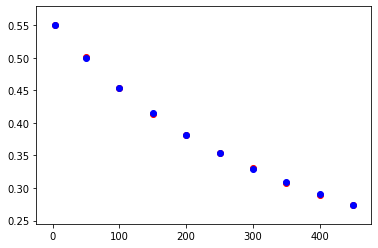

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from math import *

lx = []
ly = []
for yk,d in m:
    lx.append([yk])
    ly.append([d])

pr = TPolyRegression(3)
pr.Learn(lx,ly)    
    
x = []
y = []
p = []
for yk,d in m:
    x.append(yk)
    y.append(d)
    yp = pr.GetValue([yk])[0]
    p.append(yp)
    print(yk,d - yp)

plt.scatter(x, y, color="red")
plt.scatter(x, p, color="blue")
plt.show()


In [3]:
data = [{"ab":(1000, 200), "0": (136,139), "500":(216,128), "1000":(298,169), "pos": (-308,283)},
        {"ab":( 800, 300), "0": (116,110), "500":(196, 88), "1000":(291,107), "pos": (-331,324)},
        {"ab":( 900, 300), "0": (215, 86), "500":(283, 80), "1000":(364,119), "pos": (-248,369)},
        {"ab":(1000, 300), "0": (289, 83), "500":(359, 90), "1000":(417,143), "pos": (-166,383)},
        {"ab":( 300, 500), "0": ( 66,231), "500":(131,151), "1000":(234,106), "pos": (-300,170)},
        {"ab":( 500, 500), "0": (200, 87), "500":(282, 59), "1000":(374, 61), "pos": (-253,354)},
        {"ab":( 700, 500), "0": (365, 35), "500":(439, 36), "1000":(511, 73), "pos": (-97,459)},
        {"ab":( 900, 500), "0": (526, 51), "500":(583, 79), "1000":(627,150), "pos": (84,437)},
        {"ab":(1000, 500), "0": (586, 82), "500":(641,122), "1000":(658,205), "pos": (151,389)},
        {"ab":( 100, 600), "0": (151,348), "500":(188,240), "1000":(267,158), "pos": (-196,79)},
        {"ab":( 300, 600), "0": (216,137), "500":(285, 89), "1000":(381, 71), "pos": (-213,274)},
        {"ab":( 500, 600), "0": (361, 46), "500":(438, 38), "1000":(514, 64), "pos": (-96,425)},
        {"ab":( 700, 600), "0": (519, 37), "500":(587, 55), "1000":(658,111), "pos": (86,461)},
        {"ab":( 900, 600), "0": (681,100), "500":(739,144), "1000":(760,229), "pos": (245,371)},
        {"ab":(1000, 600), "0": (757,152), "500":(797,214), "1000":(785,305), "pos": (290,300)},
        {"ab":(   0, 800), "0": (309,336), "500":(366,240), "1000":(452,173), "pos": (-96,96)},
        {"ab":( 100, 800), "0": (353,209), "500":(421,155), "1000":(523,134), "pos": (-78,199)},
        {"ab":( 300, 800), "0": (503, 95), "500":(580, 93), "1000":(688,130), "pos": (47,347)},
        {"ab":( 500, 800), "0": (682, 95), "500":(764,126), "1000":(847,205), "pos": (243,364)},
        {"ab":(   0,1000), "0": (452,288), "500":(547,250), "1000":(672,257), "pos": (5,135)},
        {"ab":( 100,1000), "0": (559,222), "500":(656,218), "1000":(791,273), "pos": (85,195)}]


In [4]:
x = []
y = []

for p in data:
    x.append(p["ab"])
    y.append(p["0"])
    
pr = TPolyRegression(5)
pr.Learn(x,y)

for p in data:
    (px,py) = pr.GetValue(p["ab"])
    (rx,ry) = p["0"]
    print(px-rx,py-ry)

xs=""
ys=""
s ="{"

for r in pr.R:
    xs += s + str(r[0])
    ys += s + str(r[1])
    s = ", "
xs += "}"
ys += "}"
print("xs=", xs)
print("ys=", ys)

0.006930520863534184 0.0018586765552299767
0.039003936451081245 0.015551653187685588
0.00831167029059543 0.00242643766796391
-0.013476567974066711 -0.0068761630734570645
0.15026535391012885 0.06361442127393957
0.05596089736573617 0.02304680168091977
-0.0003101162720327011 -0.0014976697864028665
-0.016992854607906338 -0.009104037231736584
-0.010179438685554487 -0.006316460013522374
0.18637364778081178 0.07927469068607707
0.07956950103931604 0.033348513225490706
0.012069552694811136 0.00381736119609144
-0.014822089958670404 -0.008486248770708471
0.00017817700063460506 -0.002717813700201077
0.023851450657275564 0.007218665077516562
0.0826333384575264 0.03435180366795976
0.04241493280636632 0.016681985138802702
-0.0057797911603643115 -0.0051690009489533395
-0.009805774982623916 -0.008303284797676724
0.002070649599772878 -0.0039435519283870235
-0.004345742757323023 -0.007645870791918696
xs= {-22139.407351698046, 146.02681244760615, 48.072475015170795, -0.3764678978298519, -0.283106072532499

In [10]:
x = []
y = []

for p in data:
    x.append(p["0"])
    (rx,ry) = p["ab"]
    y.append((rx,ry))
    
pr = TPolyRegression(4)
pr.Learn(x,y)

for p in data:
    (px,py) = pr.GetValue(p["0"])
    (rx,ry) = p["ab"]
    print(px-rx,py-ry)

xs=""
ys=""
s ="{"

for r in pr.R:
    xs += s + str(r[0])
    ys += s + str(r[1])
    s = ", "
xs += "}"
ys += "}"
print("xs=", xs)
print("ys=", ys)

-201.2887134288551 96.89442466620767
-2.4060714427483845 1.8538751683481678
-94.2513877144238 52.63223089803273
-191.47428608091104 97.0254728586952
55.31647210046623 -26.451679829726174
286.0959317216905 -145.65845158076002
-256.7192793519962 129.49063818153627
17.76325757950508 -5.550785790684131
-278.5065384576192 134.88042291694546
-39.845264130486655 19.07139688080963
122.84385859896906 -60.908001988850174
251.827689247767 -130.8707342594521
95.8443850895037 -47.7933032584333
-138.69472039961693 68.59136193339509
-18.04581354757829 8.7821773213509
83.26887374140574 -39.894008221878266
-38.1618767541936 18.664734096443226
140.01800048704172 -68.849706694813
218.60790223414006 -107.60754904580244
-111.4616977557971 53.41811382476817
99.26927956291911 -47.72064958373812
xs= {-26261.902571553917, 507.9945043545156, 133.4832850279486, -3.5515961487386027, -1.5943763142906482, -0.27008910752906884, 0.010727956521839967, 0.006485266638804579, 0.00167546731627609, 0.00028054877652713647, 

In [6]:
from math import *

def getPos(data):
    R1 = 175
    R2 = 40
    R3 = 265
    R4 = 59

    (A,B) = data
    
    a = pi * (A - 500) / 1000
    b = pi * (B - 500) / 1000
    
    return (R1 * sin(b) + R2 * sin(b - pi / 4) + R3 * sin(a + b - pi / 4) + R4 * sin(a + b - pi / 4 - pi / 2),
            R1 * cos(b) + R2 * cos(b - pi / 4) + R3 * cos(a + b - pi / 4) + R4 * cos(a + b - pi / 4 - pi / 2))
    
for d in data:
    print(d["ab"], getPos(d["ab"]), d["pos"])

(1000, 200) (-280.81425297019564, 349.1128173699115) (-308, 283)
(800, 300) (-315.2468201330819, 357.16664204250935) (-331, 324)
(900, 300) (-242.09869810576262, 400.343129437563) (-248, 369)
(1000, 300) (-159.18843163444026, 418.80239631231024) (-166, 383)
(300, 500) (-299.2513149425471, 186.46579238801) (-300, 170)
(500, 500) (-257.38686835190333, 348.94826817189073) (-253, 354)
(700, 500) (-128.0130165782362, 455.79204806779984) (-97, 459)
(900, 500) (39.453826256404284, 466.18643964201266) (84, 437)
(1000, 500) (117.3797256769669, 432.38686835190333) (151, 389)
(100, 600) (-216.589422794304, 102.34640598841227) (-196, 79)
(300, 600) (-226.98381436851682, 269.81324882305273) (-213, 274)
(500, 600) (-136.95851333205968, 411.40644074447084) (-96, 425)
(700, 600) (19.099875166581974, 473.0421950142718) (86, 461)
(900, 600) (181.58235095046274, 431.177748423628) (245, 371)
(1000, 600) (245.24964345131812, 374.9520186772802) (290, 300)
(0, 800) (-123.1316910778601, 125.55147391553638) (-

In [2]:
def reverse(f, result, init, step):
    q1 = [-1] * len(init)
    ql = [1] * len(init)
    q0 = [0] * len(init)
    q = [list(q1)]
    while q1 != ql:
        for i in range(len(q1)):
            if q1[i] != 1:
                q1[i] += 1
                for j in range(i):
                    q1[j] = -1
                break
        if q1 != q0:
            q.append(list(q1))
    
    v0 = f(init)
    d0 = 0
    for k in range(len(v0)):
        d0 += (v0[k] - result[k]) ** 2
    while True:
        d2 = d0
        for a in q:
            i1 = []
            for k in range(len(init)):
                i1.append(init[k] + a[k] * step)
            v1 = f(i1)
            d1 = 0
            for k in range(len(v1)):
                d1 += (v1[k] - result[k]) ** 2
            if d1 < d2:
                d2 = d1
                i2 = i1
        if d2 == d0:
            return init
        init = i2
        d0 = d2

print(reverse(lambda x: [x[0] + 2*x[1]], [4], (0,0), 0.1 ))
print(reverse(lambda x: [2 * x[0] + 1], [9], [0], 0.1))
print(reverse(lambda x: [x[0] + 2*x[1], x[0] + x[1]], [3,2], [0,0], 0.1))

[1.4000000000000001, 1.3]
[4.000000000000002]
[0.9999999999999999, 0.9999999999999999]


In [13]:
x = []
y = []
for d in data:
    r = reverse(getPos, d["pos"], d["ab"], 0.1)
    x.append(r)
    y.append(d["ab"])

pr = TPolyRegression(2)
pr.Learn(x,y)

for i in range(len(data)):
    
    (px,py) = pr.GetValue(x[i])
    (rx,ry) = y[i]
    print(px-rx,py-ry)

c=""
s ="{"

for r in pr.R:
    for d in r:
        c += s + str(d)
        s = ", "
c += "}"
print(c)


-30.82068763475172 10.182417280898278
42.25805020379323 -18.519649616434208
16.51551496118043 -3.977012108822521
-10.85990172279844 5.93486416139973
-4.162980946886762 2.9308959232618577
4.291626920887666 -2.8972767884326913
-54.61187422958403 27.684816751392532
29.08133710516381 -12.785698221280938
-3.5037022950348273 -0.41993525517898433
-11.792137708762297 6.363886998922453
16.130167002294456 -9.36696701481435
14.69526416594772 -8.434486887874755
-55.42110958664489 26.82899913034271
24.064208859684413 -10.502788649919921
-13.331133392201764 5.586544782164992
-2.4201810010246745 -0.1491843092576346
14.076071267317644 -5.554577357546009
27.88371728476136 -17.152808850673637
9.80111025855382 -2.56505843672187
-10.168699107093591 8.625159602617032
-1.704660402745148 -1.8121411340238183
{-183.628449874737, 242.43148924781872, 0.5239651492979012, 0.5069566318724195, 1.1910230397869288, -0.20377375204484238, -0.0002828810313428962, 0.00014770070135699696, -0.00026993627067742326, 0.0001551

In [77]:
for d in data:
    r = reverse(getPos, d["pos"], d["ab"], 0.1)
    print(d["ab"],r)


(1000, 200) [1097.6999999999384, 95.10000000000596]
(800, 300) [929.0000000000293, 203.09999999999303]
(900, 300) [1013.2000000000257, 219.5999999999921]
(1000, 300) [1100.0999999999362, 226.99999999999167]
(300, 500) [284.4999999999965, 496.4999999999992]
(500, 500) [504.9000000000011, 501.90000000000043]
(700, 500) [661.5999999999913, 542.8000000000097]
(900, 500) [1011.5000000000254, 469.39999999999304]
(1000, 500) [1100.4999999999359, 474.79999999999427]
(100, 600) [55.20000000000192, 617.800000000004]
(300, 600) [288.8999999999975, 619.3000000000044]
(500, 600) [507.0000000000016, 627.5000000000063]
(700, 600) [660.199999999991, 668.6000000000156]
(900, 600) [1013.1000000000257, 593.7999999999986]
(1000, 600) [1100.4999999999359, 601.5000000000003]
(0, 800) [-62.70000000000062, 869.8000000000159]
(100, 800) [59.000000000001975, 873.7000000000168]
(300, 800) [295.1999999999989, 868.5000000000156]
(500, 800) [513.5000000000031, 881.8000000000186]
(0, 1000) [-63.80000000000064, 1132.